### scRNA seq and Organoids: a new window into disease and development
This notebook contains all relevant code that was used in order to process data and get the results presented in [the final report](https://github.com/vfschumann/Organoids_sc_WS2122/blob/master/Final_report.ipynb). The subsampled datasets that were used here can be found [here](https://drive.google.com/drive/folders/1hHSjb9trIkdAqvrqP87eylyNNcradmp5?usp=sharing). 

Code in this notebook was contributed by: Vic-Fabienne Schumann, Olyssa Sperling 

In order to reproduce this analysis a Python environment, please see [this list of package dependencies](https://github.com/vfschumann/Organoids_sc_WS2122/blob/master/PythonPackageDepencies_ScanPy.tsv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.8 pynndescent==0.5.5


In [3]:
# reading data
# !! change this cell with local file path !!


# biospsy tissue samples, endometrium
adata_ti = sc.read_h5ad(
            "/home/vfs/PycharmProjects/Organoids_sc_WS2122/data/Garcia_Alonso_tissue/GarciaAlsonso_tissue_subsampled.h5ad")

In [4]:
# unique feature names
adata_ti.var_names_make_unique()
# normalize
sc.pp.normalize_total(adata_ti, target_sum=1e4)
# logarithmize
sc.pp.log1p(adata_ti)

normalizing counts per cell
    finished (0:00:00)


In [5]:
# endometrial organoids, 1 donor 
# !! change this cell with local file path !!

adata_org = sc.read_h5ad(
            "/home/vfs/PycharmProjects/Organoids_sc_WS2122/data/Garcia_Alonso_tissue/GarciaAlsonso_organoid_subsampled.h5ad"
)

In [6]:
# unique feature names
adata_org.var_names_make_unique()
# normalize
sc.pp.normalize_total(adata_org, target_sum=1e4)
# logarithmize
sc.pp.log1p(adata_org)

normalizing counts per cell
    finished (0:00:00)


## Objective: Do endometerial organoid cell types resemble the tissue cell types? 

## Analysis steps:  
### Tissue
* sample clustering and check for merge possibility 
    - PCA plot
    - UMAP (all samples, sample wise coloring)
    - UMAP after samples -> check if mergeable
* merge samples
    - UMAP for confirmation again
* subsample for epithila cell types bc those are the once we expect in organoids too
* cluster/UMAP again

### Organoids 
* sample clustering and check for merge possibility 
    - PCA plot
    - UMAP (all samples, sample wise coloring)
    - UMAP after samples -> check if mergeable
* merge samples
    - UMAP for confirmation again

## Downstream analysis: 
* plot with proportion number of cells per cell type (?)
* correlation between increase of certain cell type in tissue and organoids

### Tissue: sample clustering and check for merge possibility

computing PCA
    with n_comps=50
    finished (0:00:55)


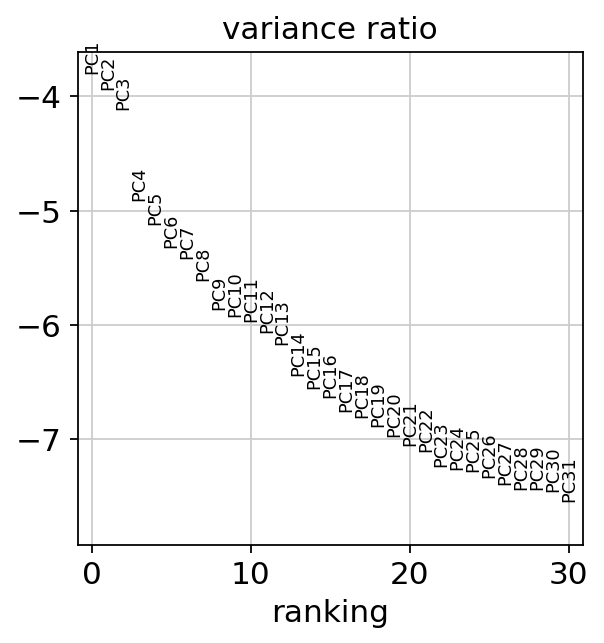

In [43]:
# PCA 
sc.tl.pca(adata_ti, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_ti, log=True)

The ellbow starts to flatten with 31 PCs. One could calculate more. However, the comparabily low detail of the celltype
labeling indicates that this is not necessary.

In [5]:
# UMAP all samples

sc.pp.neighbors(adata_ti, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_ti)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:57)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


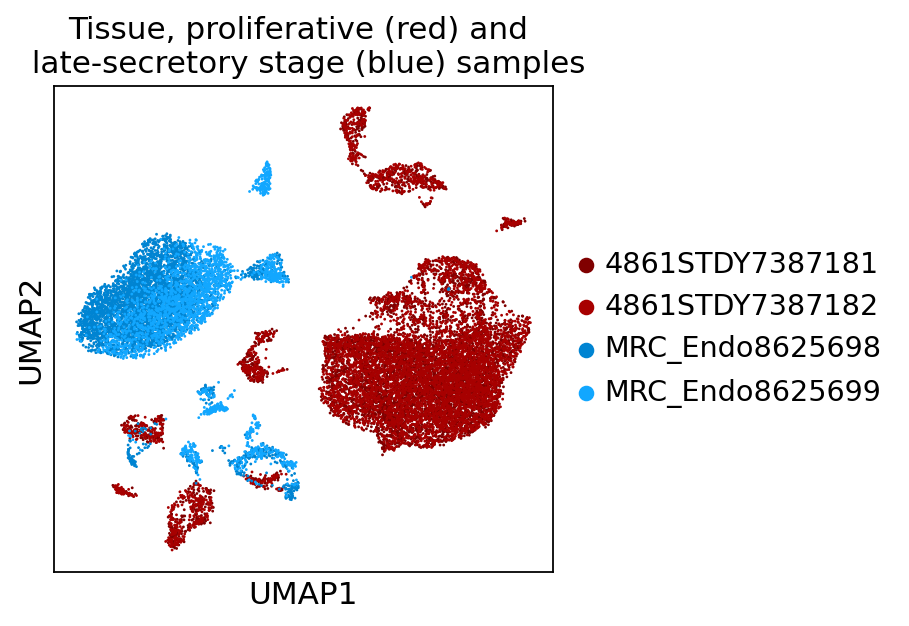

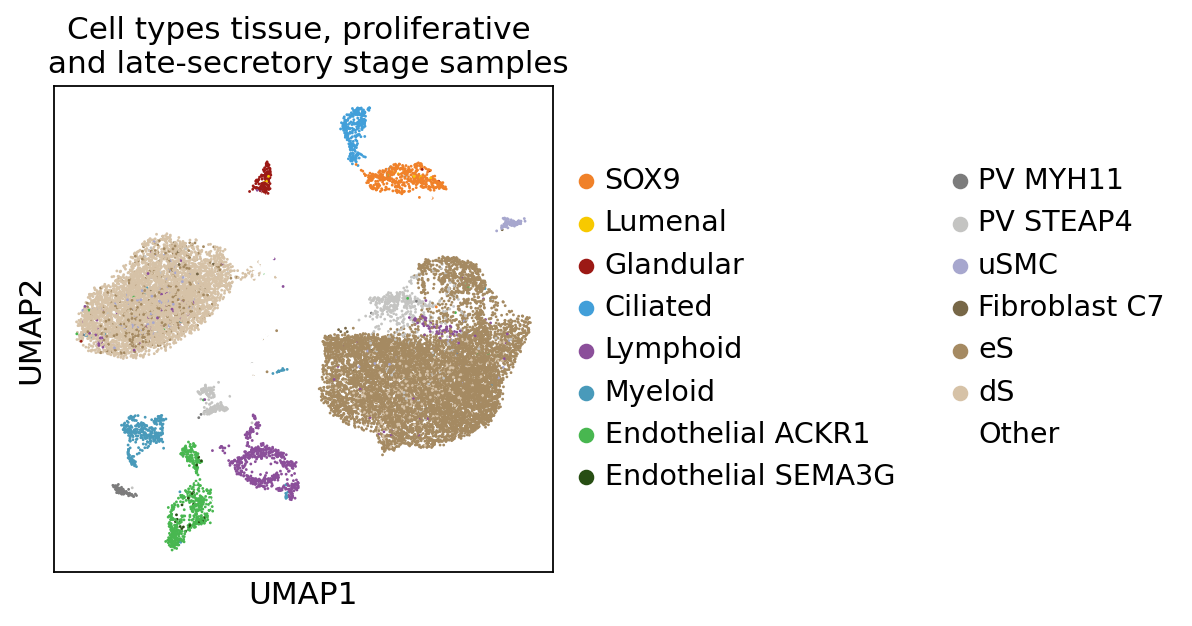

In [8]:
sc.pl.umap(adata_ti, color="SampleID", title="Tissue, proliferative (red) and \n late-secretory stage (blue) samples")
sc.pl.umap(adata_ti, color="Cell type", title="Cell types tissue, proliferative \n and late-secretory stage samples")


Those UMAPs indicate that the two samples from each state could be merged together. (Why? elaborate)

In [7]:
# enabel sample wise analysis
adata_ti_pro_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181", :]  #pro sample 1
adata_ti_pro_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182", :]  #pro sample 2
adata_ti_sec_1 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625698", :]  #sec sample 1
adata_ti_sec_2 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625699", :]  #sec sample 2

# merging both proliferating phase sample, and both secretory stage samples
adata_ti_merged_proliferative = ad.concat([adata_ti_pro_1,adata_ti_pro_2], join="outer")
adata_ti_merged_secretory = ad.concat([adata_ti_sec_1,adata_ti_sec_2], join="outer")

data_list_merged_ti = [adata_ti_merged_proliferative, adata_ti_merged_secretory]

In [11]:
# UMAP per men.cycle stage
for item in data_list_merged_ti:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical


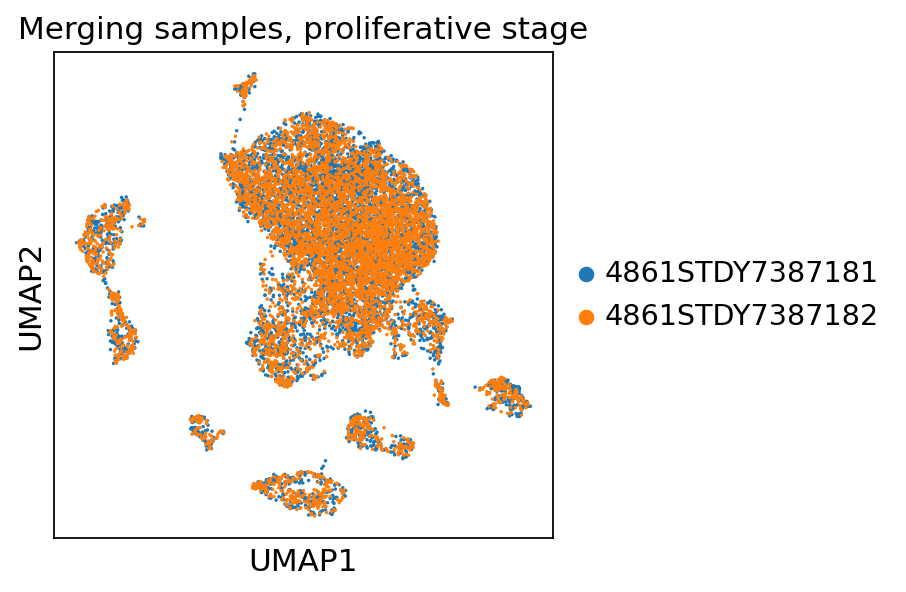

/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cell type' as categorical


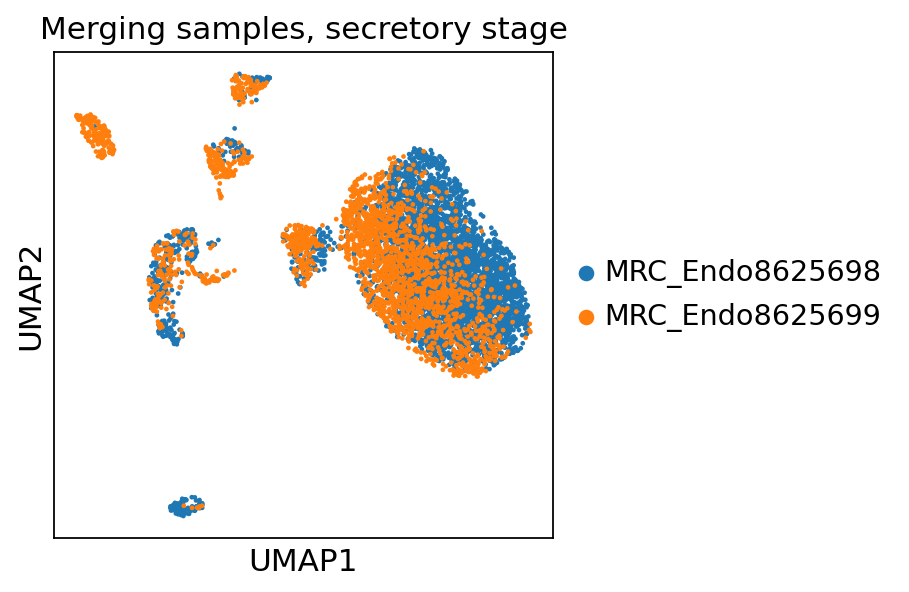

In [12]:
sc.pl.umap(adata_ti_merged_proliferative, color="SampleID", title = "Merging samples, proliferative stage" )
sc.pl.umap(adata_ti_merged_secretory, color="SampleID", title = "Merging samples, secretory stage")

the two samples cluster together very good. No data integration is needed.

Now we check for cell types similarities between the phases

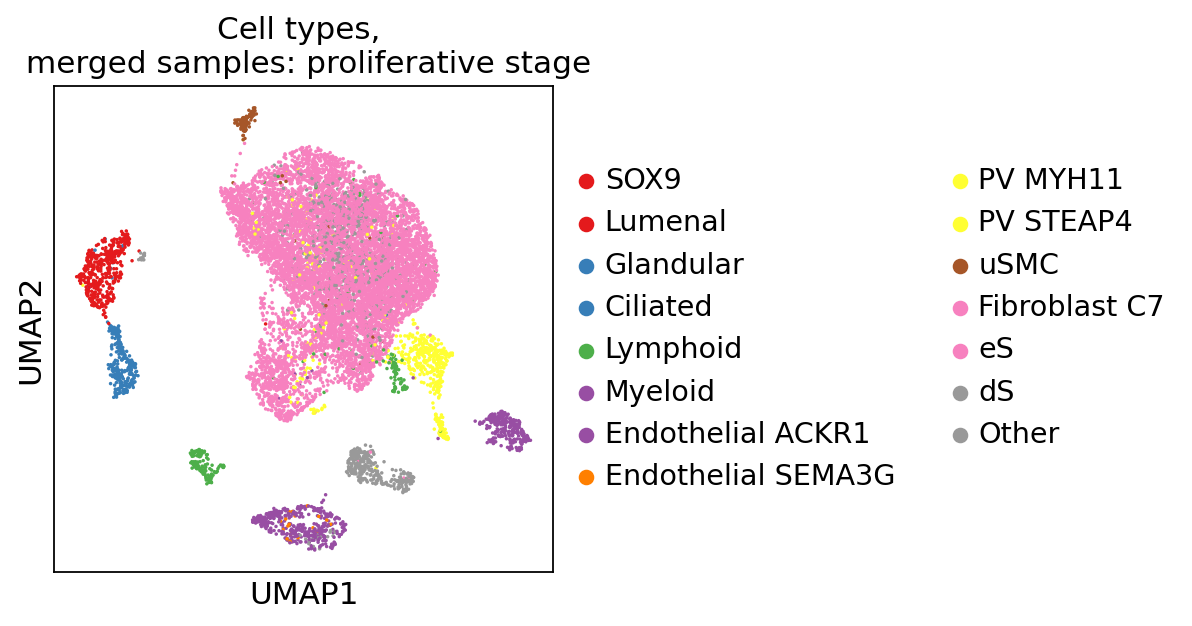

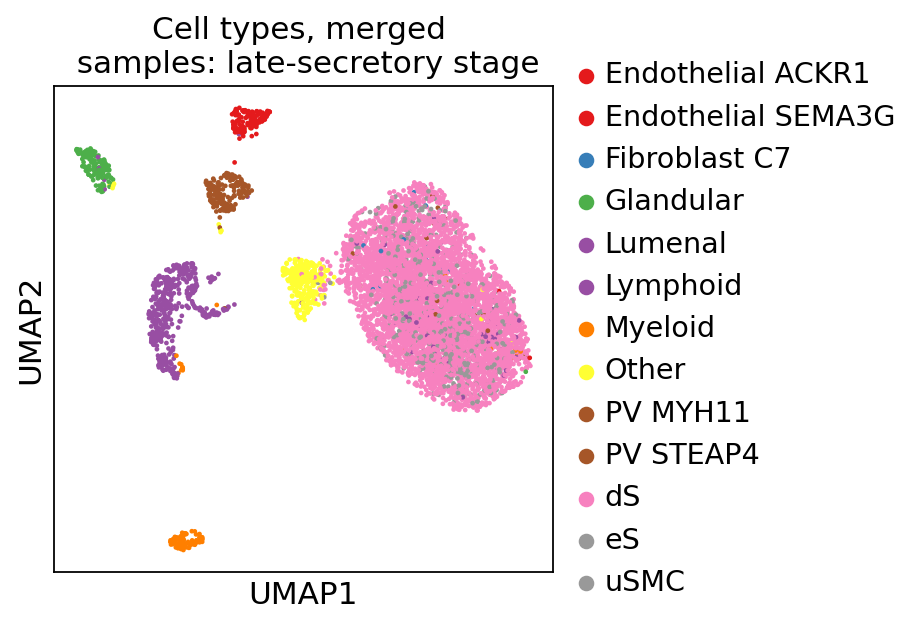

In [18]:
# UMAP for cell types
sc.pl.umap(adata_ti_merged_proliferative, color="Cell type", title = "Cell types, \n merged samples: proliferative stage")
sc.pl.umap(adata_ti_merged_secretory, color="Cell type", title = "Cell types, merged \n samples: late-secretory stage")
# TODO force color on cell type, for comparability of both plots

Since in organoids we will only expect epithelia cell types we subsample the tissue samples for epithila cell types
only too. Taken from [the paper](link to mapping paper) the epithelia cell types are:  Lumen, Gland, SOX9, Cilia

In [5]:
adata_ti.obs["Cell type"].cat.categories

Index(['SOX9', 'Lumenal', 'Glandular', 'Ciliated', 'Lymphoid', 'Myeloid',
       'Endothelial ACKR1', 'Endothelial SEMA3G', 'PV MYH11', 'PV STEAP4',
       'uSMC', 'Fibroblast C7', 'eS', 'dS', 'Other'],
      dtype='object')

In [7]:
# subsampling tissue for epithelia cells - based on Garcia-Alonso Fig. 1
adata_ti_epithelia = adata_ti[adata_ti.obs["Cell type"].isin(["Glandular",
                                                              "Lumenal",
                                                              "Ciliated",
                                                              "SOX9"
                                                              ]),:]

# enable sample wise analysis
adata_ti_pro_epithel_1 = adata_ti_epithelia[adata_ti_epithelia.obs["SampleID"] == "4861STDY7387181", :]  #pro sample 1
adata_ti_pro_epithel_2 = adata_ti_epithelia[adata_ti_epithelia.obs["SampleID"] == "4861STDY7387182", :]  #pro sample 2
adata_ti_sec_epithel_1 = adata_ti_epithelia[adata_ti_epithelia.obs["SampleID"] == "MRC_Endo8625698", :]  #sec sample 1
adata_ti_sec_epithel_2 = adata_ti_epithelia[adata_ti_epithelia.obs["SampleID"] == "MRC_Endo8625699", :]  #sec sample 2

# merging both proliferating phase sample, and both secretory stage samples
adata_ti_merged_proliferative_epithelia = ad.concat([adata_ti_pro_epithel_1,adata_ti_pro_epithel_2], join="outer")
adata_ti_merged_secretory_epithelia = ad.concat([adata_ti_sec_epithel_1,adata_ti_sec_epithel_2], join="outer")

data_list_merged_ti_epithelia = [adata_ti_merged_proliferative_epithelia, adata_ti_merged_secretory_epithelia]

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:05)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical


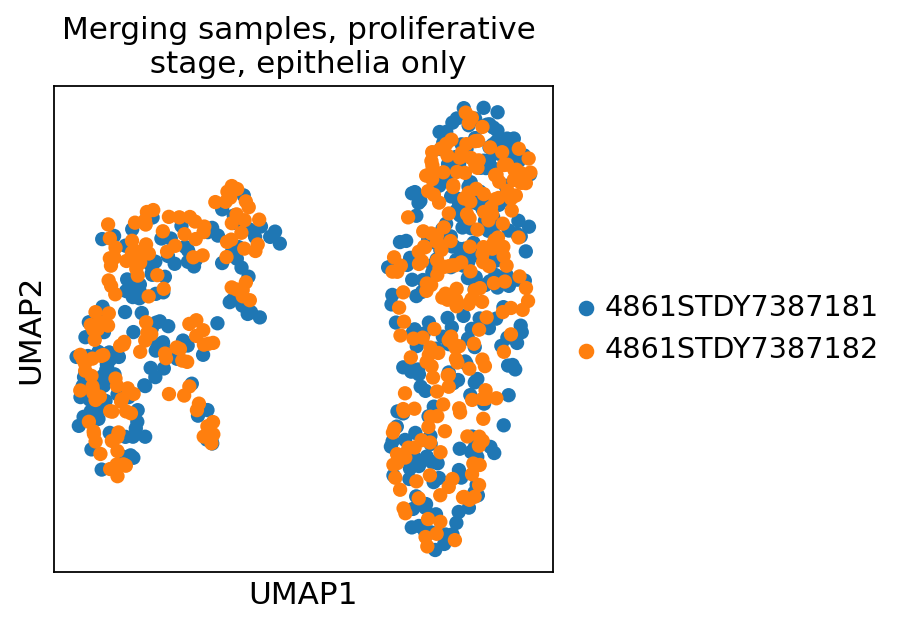

/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cell type' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorica

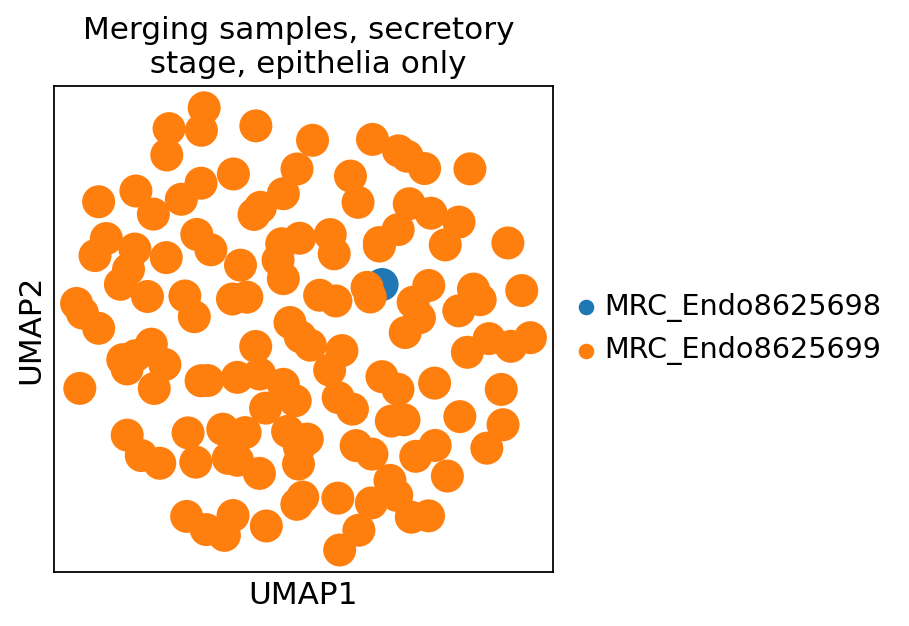

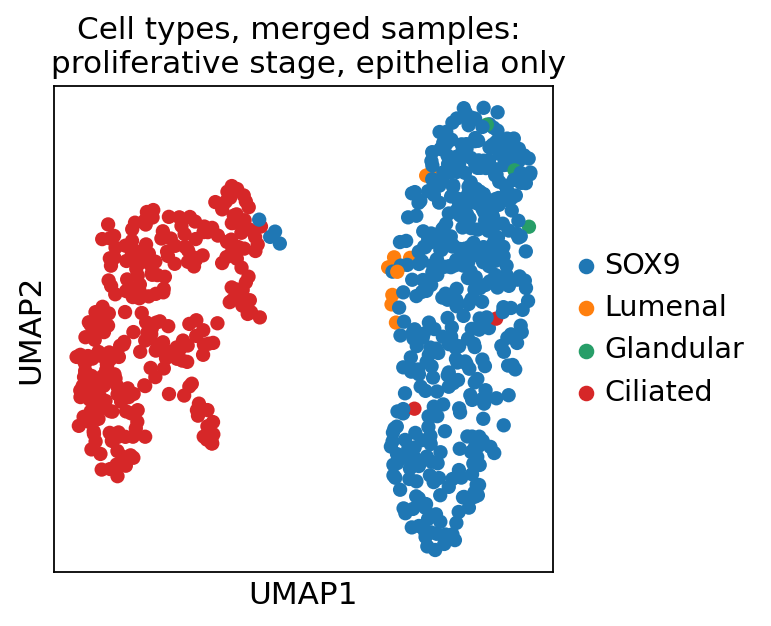

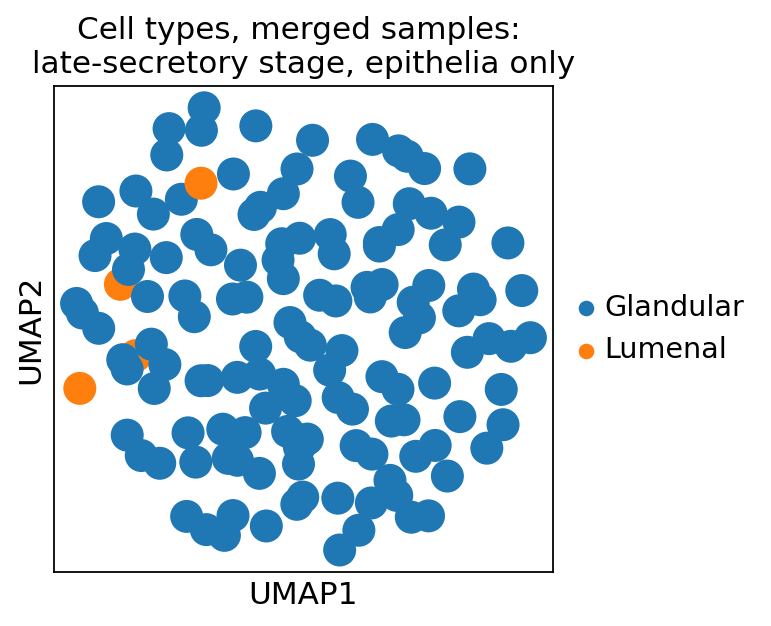

In [8]:
# UMAP per men.cycle stage
for item in data_list_merged_ti_epithelia:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
# UMAPs sanity check, merging
sc.pl.umap(adata_ti_merged_proliferative_epithelia, 
           color="SampleID", 
           title = "Merging samples, proliferative \n "
                   "stage, epithelia only" )
sc.pl.umap(adata_ti_merged_secretory_epithelia, 
           color="SampleID", 
           title = "Merging samples, secretory \n "
                   "stage, epithelia only")
# UMAP for cell types
sc.pl.umap(adata_ti_merged_proliferative_epithelia, 
           color="Cell type", 
           title = "Cell types, merged samples: \n "
                   "proliferative stage, epithelia only")
sc.pl.umap(adata_ti_merged_secretory_epithelia, 
           color="Cell type", 
           title = "Cell types, merged samples: \n"
                   "late-secretory stage, epithelia only")
# TODO force color on cell type, for comparability of both plots

In order to get a feeling if the amount of cells of certain cell types have changed across the cycle we analysed
proportional changes of cell counts per cell type between both states.

1. get total cell number per sample (tissue-prolif, tissue-secre, organoid-cntlr, organoid-E2 treated)
2. get cell number per cell type
3. get proportion per cell type
4. indicate increase or decrease over time

In [34]:
for item in data_list_merged_ti_epithelia:
    print(
        len(item)
    )

723
136


In [41]:
# the following could be done nicely with pandas and numpy....
# however due to the lack of time and ready-to-use expertise this is the workaround: using the plotted values and get the necessary results through
# some g_sheets wrangling. 
# sorry :) 


# proliferative phase
celltype_list_prolif = adata_ti_merged_proliferative_epithelia.obs["Cell type"].drop_duplicates().tolist() # no idea why the usual .cat.categories doesn't work on the merged objects

print("\n proliferative phase:")
for celltype in celltype_list_prolif:
    print("{}: {}".format(celltype,
                          len(adata_ti_merged_proliferative_epithelia[adata_ti_merged_proliferative_epithelia.obs["Cell type"] == celltype,:])
                          ))
    
# secretory phase
celltype_list_secret = adata_ti_merged_proliferative_epithelia.obs["Cell type"].drop_duplicates().tolist() # no idea why the usual .cat.categories doesn't work on the merged objects

print("\n secretory phase:")
for celltype in celltype_list_secret:
    print("{}: {}".format(celltype,
                          len(adata_ti_merged_secretory_epithelia[adata_ti_merged_secretory_epithelia.obs["Cell type"] == celltype,:])
                          ))


 proliferative phase:
SOX9: 435
Ciliated: 275
Lumenal: 10
Glandular: 3

 secretory phase:
SOX9: 0
Ciliated: 0
Lumenal: 4
Glandular: 132


Downstream analysis and change of proportions was analysed using google sheets: [see here](https://docs.google.com/spreadsheets/d/1yCcqXxplZhSOHgNNA_vsZcw_-rOKjfhCtK3pcmgvWrY/edit#gid=532110885)

## Organoids

computing PCA
    with n_comps=50
    finished (0:01:15)


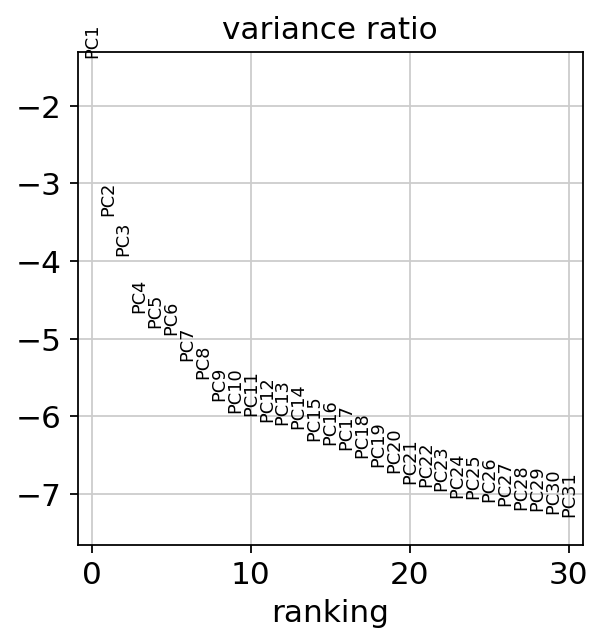

In [4]:
# PCA 
sc.tl.pca(adata_org, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_org, log=True)

same as for tissue: The ellbow starts to flatten with 31 PCs. One could calculate more. However, the comparabily low detail of the celltype labeling indicates that this is not necessary.

In [6]:
# UMAP all samples

sc.pp.neighbors(adata_org, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_org)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:01:27)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:37)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)


In [8]:
adata_org.obs

demultiplexed     sample_names  log2p1_count  \
WSSS_END9397520_AAACCCAAGTAGGAAG            U2  WSSS_END9397520     13.902563   
WSSS_END9397520_AAACCCACACAAGCTT            U2  WSSS_END9397520     13.438143   
WSSS_END9397520_AAACCCACACATGTTG            U1  WSSS_END9397520     13.585785   
WSSS_END9397520_AAACCCACACTCAAGT            U1  WSSS_END9397520     12.751125   
WSSS_END9397520_AAACCCAGTCGCACAC            U1  WSSS_END9397520     13.382354   
...                                        ...              ...           ...   
WSSS_END9397533_TTTGTTGCACAGCCAC            U2  WSSS_END9397533     12.576013   
WSSS_END9397533_TTTGTTGCAGGTTCAT           B44  WSSS_END9397533     13.092262   
WSSS_END9397533_TTTGTTGCAGTAGAAT           B44  WSSS_END9397533     13.100990   
WSSS_END9397533_TTTGTTGTCCATAAGC            U2  WSSS_END9397533     11.893681   
WSSS_END9397533_TTTGTTGTCTCGCTCA            U2  WSSS_END9397533     12.091435   

                                  percent_mito  n_genes Days Hormones  \
WSSS_END9397520_AAACCCAAGTAGGAAG      0.131979     3837    0     Ctrl   
WSSS_END9397520_AAACCCACACAAGCTT      0.086592     3261    0     Ctrl   
WSSS_END9397520_AAACCCACACATGTTG      0.124614     3421    0     Ctrl   
WSSS_END9397520_AAACCCACACTCAAGT      0.095314     2488    0     Ctrl   
WSSS_END9397520_AAACCCAGTCGCACAC      0.127189     3137    0     Ctrl   
...                                        ...      ...  ...      ...   
WSSS_END9397533_TTTGTTGCACAGCCAC      0.161835     1717    6      E+P   
WSSS_END9397533_TTTGTTGCAGGTTCAT      0.077760     2635    6      E+P   
WSSS_END9397533_TTTGTTGCAGTAGAAT      0.110871     2759    6      E+P   
WSSS_END9397533_TTTGTTGTCCATAAGC      0.082808     1205    6      E+P   
WSSS_END9397533_TTTGTTGTCTCGCTCA      0.107724     1331    6      E+P   

                                 Inhibitor  IsClonal  \
WSSS_END9397520_AAACCCAAGTAGGAAG      Ctrl     False   
WSSS_END9397520_AAACCCACACAAGCTT      Ctrl     False   
WSSS_END9397520_AAACCCACACATGTTG      Ctrl     False   
WSSS_END9397520_AAACCCACACTCAAGT      Ctrl     False   
WSSS_END9397520_AAACCCAGTCGCACAC      Ctrl     False   
...                                    ...       ...   
WSSS_END9397533_TTTGTTGCACAGCCAC      Ctrl     False   
WSSS_END9397533_TTTGTTGCAGGTTCAT      Ctrl     False   
WSSS_END9397533_TTTGTTGCAGTAGAAT      Ctrl     False   
WSSS_END9397533_TTTGTTGTCCATAAGC      Ctrl     False   
WSSS_END9397533_TTTGTTGTCTCGCTCA      Ctrl     False   

                                 Celltype_without_inhibitors        Celltype  \
WSSS_END9397520_AAACCCAAGTAGGAAG                     NH_Day0           NH_d0   
WSSS_END9397520_AAACCCACACAAGCTT                     NH_Day0           NH_d0   
WSSS_END9397520_AAACCCACACATGTTG                     NH_Day0           NH_d0   
WSSS_END9397520_AAACCCACACTCAAGT                     NH_Day0           NH_d0   
WSSS_END9397520_AAACCCAGTCGCACAC                     NH_Day0           NH_d0   
...                                                      ...             ...   
WSSS_END9397533_TTTGTTGCACAGCCAC                   Secretory  Secretory_Ctrl   
WSSS_END9397533_TTTGTTGCAGGTTCAT                   Secretory  Secretory_Ctrl   
WSSS_END9397533_TTTGTTGCAGTAGAAT                    Ciliated        Ciliated   
WSSS_END9397533_TTTGTTGTCCATAAGC                   Secretory  Secretory_Ctrl   
WSSS_END9397533_TTTGTTGTCTCGCTCA                   Secretory  Secretory_Ctrl   

                                 CellCycle Phase  
WSSS_END9397520_AAACCCAAGTAGGAAG             G2M  
WSSS_END9397520_AAACCCACACAAGCTT             G2M  
WSSS_END9397520_AAACCCACACATGTTG              G1  
WSSS_END9397520_AAACCCACACTCAAGT              G1  
WSSS_END9397520_AAACCCAGTCGCACAC              G1  
...                                          ...  
WSSS_END9397533_TTTGTTGCACAGCCAC              G1  
WSSS_END9397533_TTTGTTGCAGGTTCAT              G1  
WSSS_END9397533_TTTGTTGCAGTAGAAT              G1  
WSSS_END9397533_TTTGTTGTCCATAAGC       

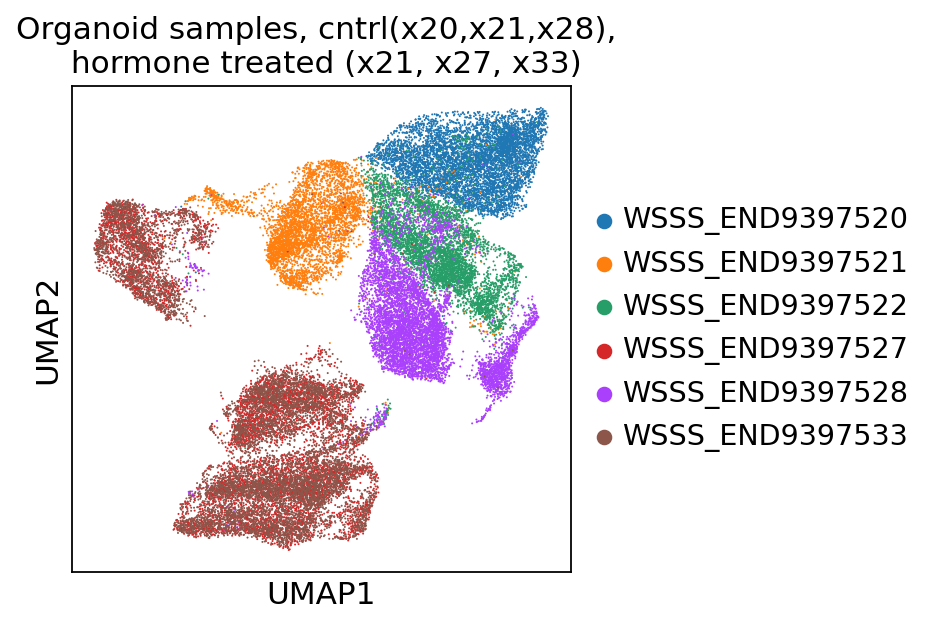

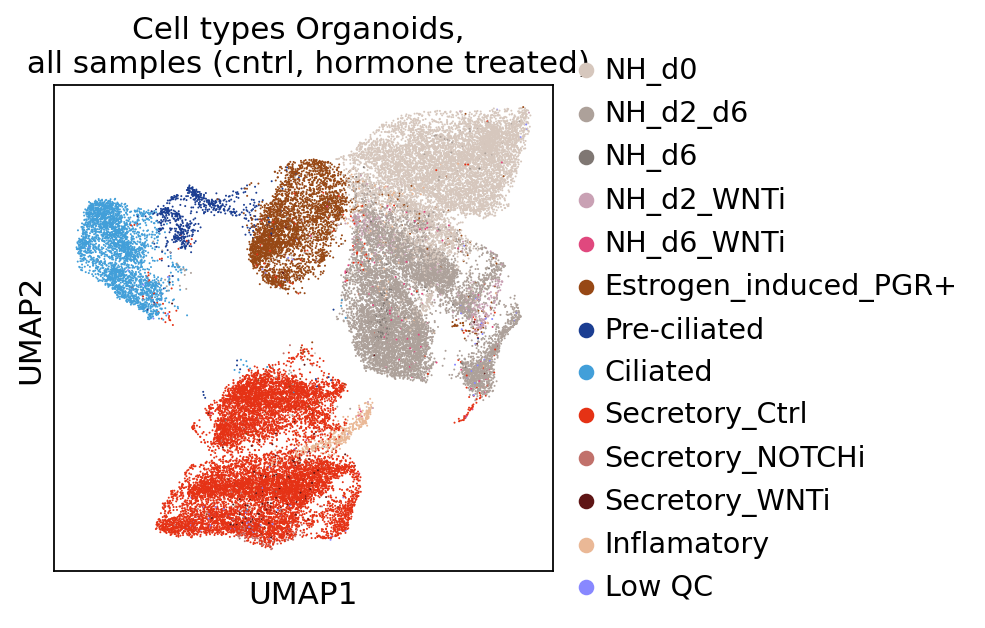

In [13]:
sc.pl.umap(adata_org, color="sample_names", title="Organoid samples, cntrl(x20,x21,x28), \n "
                                                  "hormone treated (x21, x27, x33)")
sc.pl.umap(adata_org, color="Celltype", title="Cell types Organoids, \n all samples (cntrl, hormone treated)")

Those UMAPs indicate that there is a clear distiction between the three organoid groups:  
* untreated  
* treated with E2 only  
* treated with both E2 and P4  

Therefore samples for those three groups are getting merged. 

In [8]:
# controls
adata_org_cntrl_0 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397520",:] # cntrl, day0
adata_org_cntrl_2 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397522",:] #or sample 2 # day 6, comp: XAV939, no stim
adata_org_cntrl_6 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397528",:] #or sample 3 # day 6, no stim, no compound
# merging controls
adata_org_merged_cntrl = ad.concat([adata_org_cntrl_0, 
                                   adata_org_cntrl_2, 
                                   adata_org_cntrl_6], join="outer" )

# estrogen treated
adata_org_tx_E2_0 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397521",:] # E2, day 0

# estrogen and progesteron treated 
adata_org_tx_E2P4_2 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397527",:] # E2 + P4 day 2
adata_org_tx_E2P4_6 = adata_org[adata_org.obs["sample_names"] == "WSSS_END9397533",:] # E2 + P4, day 6
# merging E2P4 treated
adata_org_merged_E2P4 = ad.concat([adata_org_tx_E2P4_2, 
                                  adata_org_tx_E2P4_6], join="outer")

data_list_org_groups = [adata_org_merged_cntrl, 
                       adata_org_tx_E2_0,
                       adata_org_merged_E2P4]

In [6]:
# calculated UMAPs
for item in data_list_org_groups:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:01:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:35)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:35)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:36)
    finished: add

/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample_names' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Celltype_without_inhibitors' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` paramete

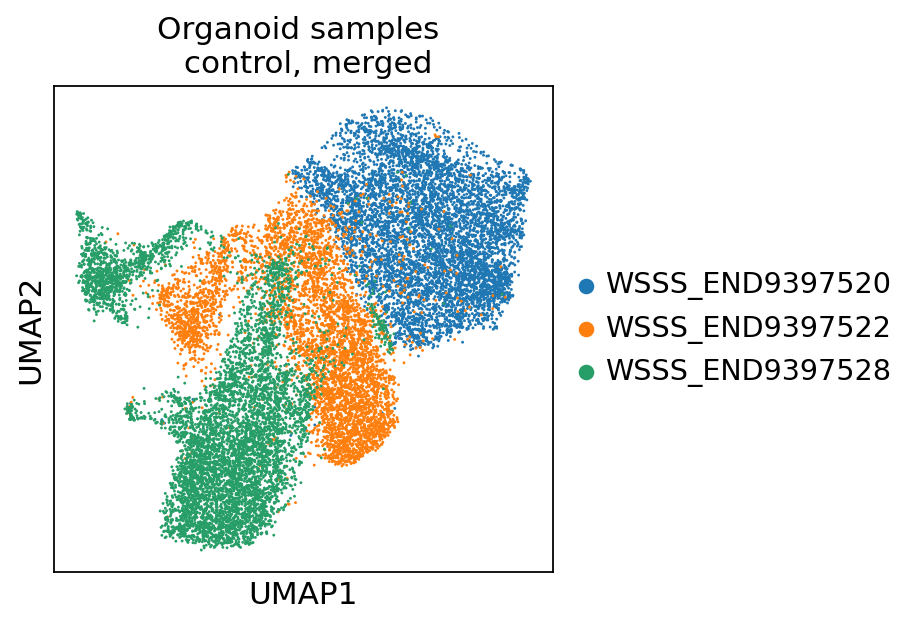

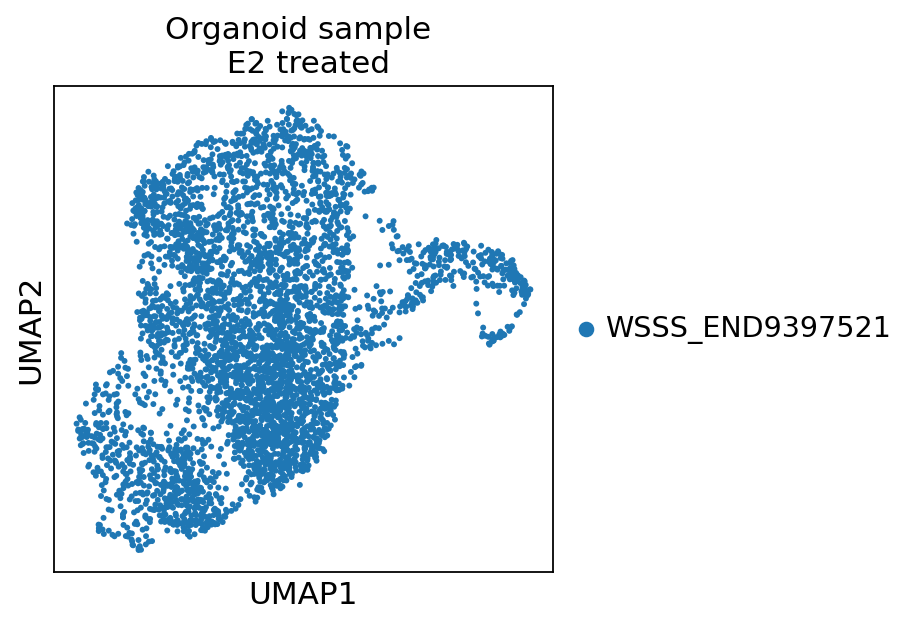

/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample_names' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Celltype_without_inhibitors' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` paramete

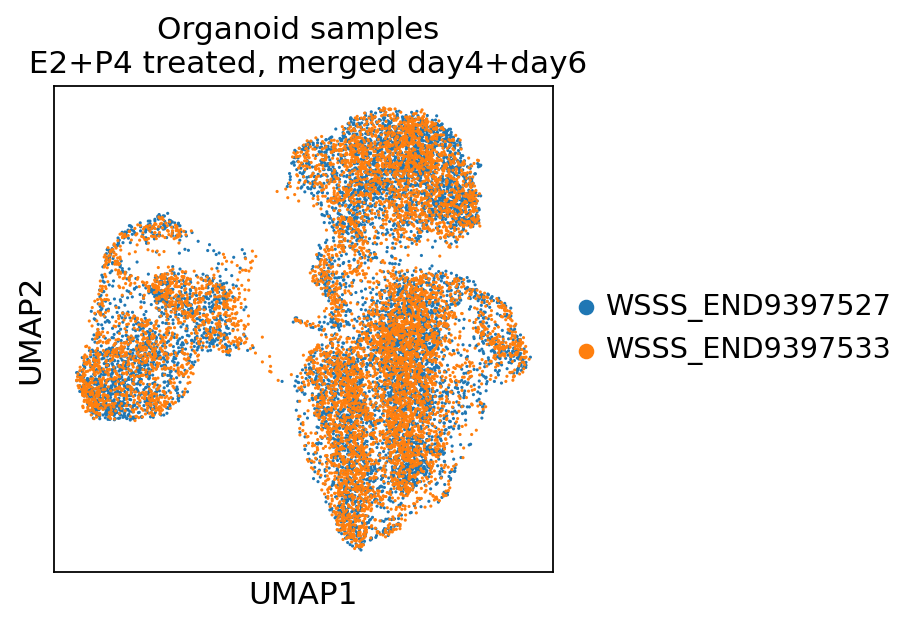

In [7]:
sc.pl.umap(adata_org_merged_cntrl, 
           color="sample_names", 
           title="Organoid samples \n control, merged")

sc.pl.umap(adata_org_tx_E2_0, 
           color="sample_names", 
           title="Organoid sample \n E2 treated")

sc.pl.umap(adata_org_merged_E2P4, 
           color="sample_names", 
           title="Organoid samples \n E2+P4 treated, merged day4+day6")

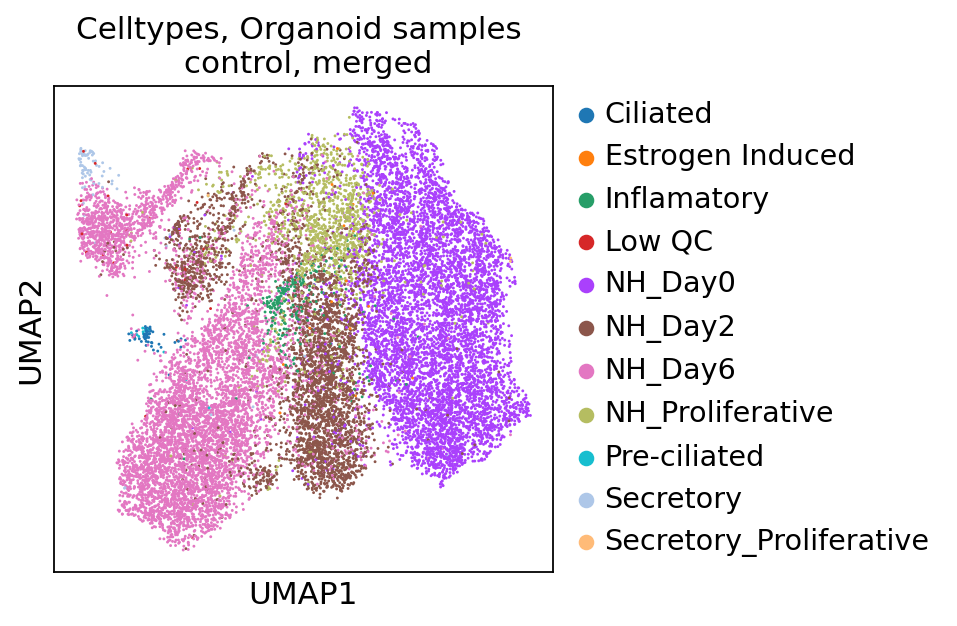

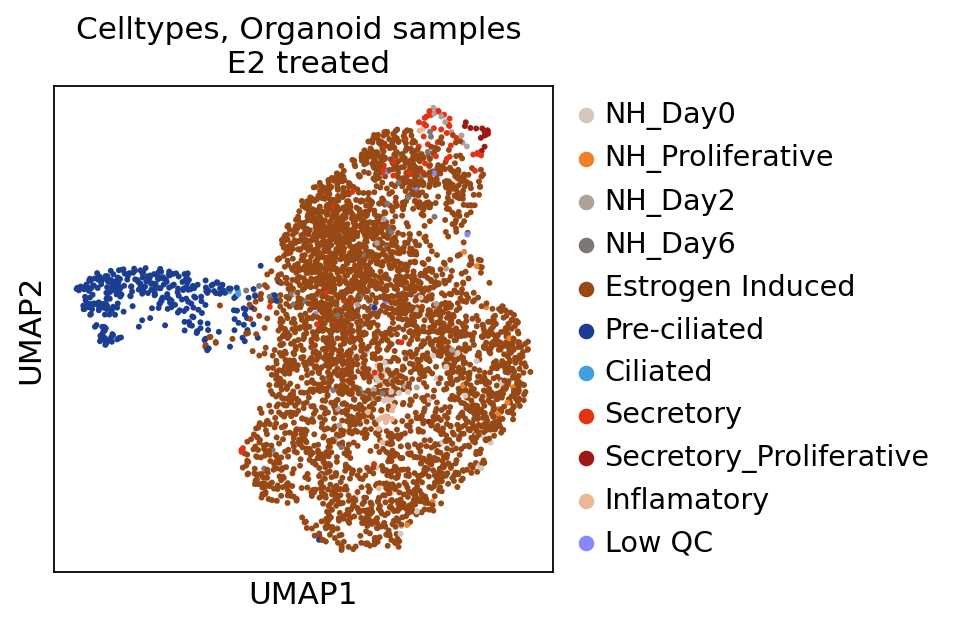

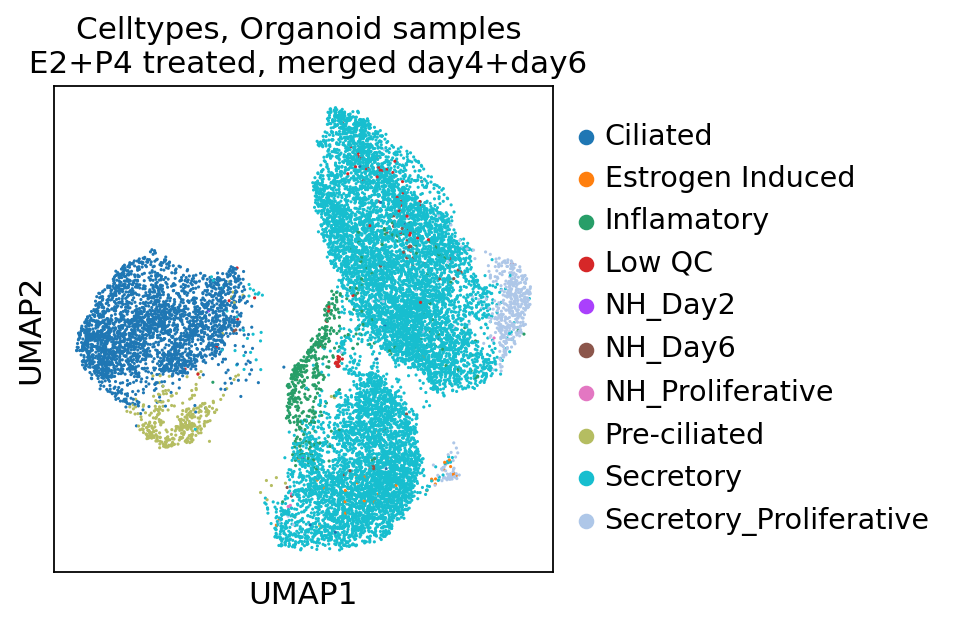

In [11]:
sc.pl.umap(adata_org_merged_cntrl, 
           color="Celltype_without_inhibitors", 
           title="Celltypes, Organoid samples \n control, merged")

sc.pl.umap(adata_org_tx_E2_0, 
           color="Celltype_without_inhibitors", 
           title="Celltypes, Organoid samples \n E2 treated")

sc.pl.umap(adata_org_merged_E2P4, 
           color="Celltype_without_inhibitors", 
           title="Celltypes, Organoid samples \n E2+P4 treated, merged day4+day6")


!! Statement over merging decision needed !! 

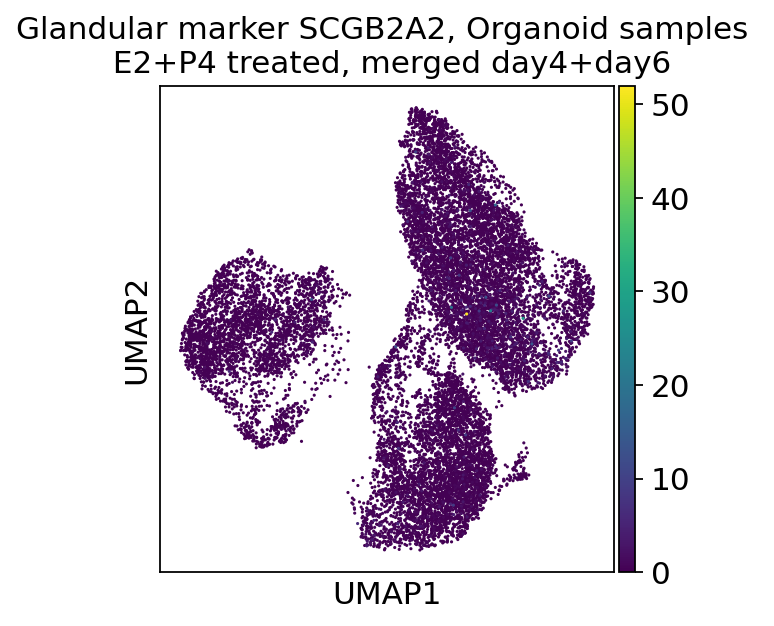

In [17]:
sc.pl.umap(adata_org_merged_E2P4, 
           color="SCGB2A2", 
           title="Glandular marker SCGB2A2, Organoid samples \n E2+P4 treated, merged day4+day6")

In order to get a feeling if the amount of cells of certain cell types have changed across the cycle we analysed
proportional changes of cell counts per cell type between both states.
1. get total cell number per sample (tissue-prolif, tissue-secre, organoid-cntlr, organoid-E2 treated)
2. get cell number per cell type
3. get proportion per cell type
4. indicate increase or decrease over time

In [35]:
for item in data_list_org_groups:
    print(
        len(item)
    )

17896
4213
14939


In [37]:
adata_org_merged_E2P4.obs

demultiplexed         SampleID  log2p1_count  \
WSSS_END9397527_AAACCCAGTATCGTAC            U1  WSSS_END9397527     12.595024   
WSSS_END9397527_AAACCCAGTGCATGAG           B44  WSSS_END9397527     13.257092   
WSSS_END9397527_AAACCCAGTTGACTAC           B44  WSSS_END9397527     13.968396   
WSSS_END9397527_AAACCCATCCGTGTGG            U1  WSSS_END9397527     13.555308   
WSSS_END9397527_AAACGAAAGGGCGAAG           B44  WSSS_END9397527     12.296916   
...                                        ...              ...           ...   
WSSS_END9397533_TTTGTTGCACAGCCAC            U2  WSSS_END9397533     12.576013   
WSSS_END9397533_TTTGTTGCAGGTTCAT           B44  WSSS_END9397533     13.092262   
WSSS_END9397533_TTTGTTGCAGTAGAAT           B44  WSSS_END9397533     13.100990   
WSSS_END9397533_TTTGTTGTCCATAAGC            U2  WSSS_END9397533     11.893681   
WSSS_END9397533_TTTGTTGTCTCGCTCA            U2  WSSS_END9397533     12.091435   

                                  percent_mito  n_genes Days Hormones  \
WSSS_END9397527_AAACCCAGTATCGTAC      0.130294     1977    6      E+P   
WSSS_END9397527_AAACCCAGTGCATGAG      0.121565     2975    6      E+P   
WSSS_END9397527_AAACCCAGTTGACTAC      0.125281     4106    6      E+P   
WSSS_END9397527_AAACCCATCCGTGTGG      0.149456     3571    6      E+P   
WSSS_END9397527_AAACGAAAGGGCGAAG      0.140926     1824    6      E+P   
...                                        ...      ...  ...      ...   
WSSS_END9397533_TTTGTTGCACAGCCAC      0.161835     1717    6      E+P   
WSSS_END9397533_TTTGTTGCAGGTTCAT      0.077760     2635    6      E+P   
WSSS_END9397533_TTTGTTGCAGTAGAAT      0.110871     2759    6      E+P   
WSSS_END9397533_TTTGTTGTCCATAAGC      0.082808     1205    6      E+P   
WSSS_END9397533_TTTGTTGTCTCGCTCA      0.107724     1331    6      E+P   

                                 Inhibitor  IsClonal  \
WSSS_END9397527_AAACCCAGTATCGTAC      Ctrl     False   
WSSS_END9397527_AAACCCAGTGCATGAG      Ctrl     False   
WSSS_END9397527_AAACCCAGTTGACTAC      Ctrl     False   
WSSS_END9397527_AAACCCATCCGTGTGG      Ctrl     False   
WSSS_END9397527_AAACGAAAGGGCGAAG      Ctrl     False   
...                                    ...       ...   
WSSS_END9397533_TTTGTTGCACAGCCAC      Ctrl     False   
WSSS_END9397533_TTTGTTGCAGGTTCAT      Ctrl     False   
WSSS_END9397533_TTTGTTGCAGTAGAAT      Ctrl     False   
WSSS_END9397533_TTTGTTGTCCATAAGC      Ctrl     False   
WSSS_END9397533_TTTGTTGTCTCGCTCA      Ctrl     False   

                                 Celltype_without_inhibitors        Celltype  \
WSSS_END9397527_AAACCCAGTATCGTAC                   Secretory  Secretory_Ctrl   
WSSS_END9397527_AAACCCAGTGCATGAG                     NH_Day6           NH_d0   
WSSS_END9397527_AAACCCAGTTGACTAC                 Inflamatory     Inflamatory   
WSSS_END9397527_AAACCCATCCGTGTGG                    Ciliated        Ciliated   
WSSS_END9397527_AAACGAAAGGGCGAAG                   Secretory  Secretory_Ctrl   
...                                                      ...             ...   
WSSS_END9397533_TTTGTTGCACAGCCAC                   Secretory  Secretory_Ctrl   
WSSS_END9397533_TTTGTTGCAGGTTCAT                   Secretory  Secretory_Ctrl   
WSSS_END9397533_TTTGTTGCAGTAGAAT                    Ciliated        Ciliated   
WSSS_END9397533_TTTGTTGTCCATAAGC                   Secretory  Secretory_Ctrl   
WSSS_END9397533_TTTGTTGTCTCGCTCA                   Secretory  Secretory_Ctrl   

                                 CellCycle Phase merge_group_names  
WSSS_END9397527_AAACCCAGTATCGTAC              G1    organoid_E2+P4  
WSSS_END9397527_AAACCCAGTGCATGAG              G1    organoid_E2+P4  
WSSS_END9397527_AAACCCAGTTGACTAC              G1    organoid_E2+P4  
WSSS_END9397527_AAACCCATCCGTGTGG              G1    organoid_E2+P4  
WSSS_END9397527_AAACGAAAGGGCGAAG              G1    organoid_E2+P4  
...                                          ...               ...  
WSSS_END9397533_TTTGTTGCACAGCCAC              G1    organoid_E2+P4

In [40]:
# the following could be done nicely with pandas and numpy....
# however due to the lack of time and ready-to-use expertise this is the workaround: using the plotted values and get the necessary results through
# some g_sheets wrangling. 
# sorry :) 
data_list_org_groups = [adata_org_merged_cntrl, 
                       adata_org_tx_E2_0,
                       adata_org_merged_E2P4]

# organoids_cntrl
celltype_list_organoids_cntrl = adata_org_merged_cntrl.obs[
    "Celltype_without_inhibitors"].drop_duplicates().tolist()  # no idea why the usual .cat.categories doesn't work on the merged objects

print("\n organoids_cntrl:")
for celltype in celltype_list_organoids_cntrl:
    print("{}: {}".format(celltype,
                          len(adata_org_merged_cntrl[
                              adata_org_merged_cntrl.obs["Celltype_without_inhibitors"] == celltype, :])
                          ))

# organoids_tx_E2_0
celltype_list_organoids_tx_E2_0 = adata_org_tx_E2_0.obs[
    "Celltype_without_inhibitors"].drop_duplicates().tolist()  # no idea why the usual .cat.categories doesn't work on the merged objects

print("\n organoids_tx_E2_0:")
for celltype in celltype_list_organoids_tx_E2_0:
    print("{}: {}".format(celltype,
                          len(adata_org_tx_E2_0[
                              adata_org_tx_E2_0.obs["Celltype_without_inhibitors"] == celltype, :])
                          ))
    
# organoids_tx_E2P4
celltype_list_organoids_tx_E2P4 = adata_org_merged_E2P4.obs[
    "Celltype_without_inhibitors"].drop_duplicates().tolist()  # no idea why the usual .cat.categories doesn't work on the merged objects

print("\n organoids_tx_E2P4:")
for celltype in celltype_list_organoids_tx_E2P4:
    print("{}: {}".format(celltype,
                          len(adata_org_merged_E2P4[
                              adata_org_merged_E2P4.obs["Celltype_without_inhibitors"] == celltype, :])
                          ))


 organoids_cntrl:
NH_Day0: 6613
Inflamatory: 243
NH_Day6: 6275
NH_Day2: 3409
NH_Proliferative: 1157
Pre-ciliated: 14
Ciliated: 57
Secretory: 79
Low QC: 30
Estrogen Induced: 16
Secretory_Proliferative: 3

 organoids_tx_E2_0:
Estrogen Induced: 3654
NH_Day6: 45
Secretory: 60
Pre-ciliated: 311
NH_Day0: 43
Low QC: 8
NH_Day2: 33
Inflamatory: 29
Secretory_Proliferative: 15
Ciliated: 3
NH_Proliferative: 12

 organoids_tx_E2P4:
Secretory: 10624
NH_Day6: 45
Inflamatory: 510
Ciliated: 2791
Pre-ciliated: 348
Secretory_Proliferative: 495
Low QC: 80
Estrogen Induced: 38
NH_Proliferative: 5
NH_Day2: 3


Downstream analysis and change of proportions was analysed using google sheets: [see here](https://docs.google.com/spreadsheets/d/1yCcqXxplZhSOHgNNA_vsZcw_-rOKjfhCtK3pcmgvWrY/edit#gid=532110885)

## Comparision of propotional development of celltypes due to hormone influence in tissue and organoids
![googl_sheet_screenshot_here](images/g_sheet_screenshot.png)

## Objective: Does the cycle state of the donor influence the organoid?

### Analysis steps: 
* looking for gene marker specific for proliferative phase (endothelia cells only)
    - Table with differentially expressed genes in tissue
* check for cycle-state specificity
    - heatmap comparing proliferative tissue & secretory tissue
    - heatmap scaled and normalized
* check for transferablilty to organoids (Day0  and Day6)
    - heatmap with prolif, secretory tissue + day0, day6 organoids
    - saled and normalized 

### Differential gene expression Epithelia Tissue

WIP
see previous work on marker genes on complete tissue samples [in this notebook](https://github.com/vfschumann/Organoids_sc_WS2122/blob/master/processing_notebooks/Scanpy_Endometrium_CellxGene_TissueandOrganoids_Comparison.ipynb)

### Differential gene expression organoids 

In [8]:
for item in data_list_org_groups:    
    sc.tl.rank_genes_groups(item, 'Celltype_without_inhibitors', method='wilcoxon') 
    # TODO: it throws warings about not beeing logarithmized, idk where those come from, needs to be investigated further

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)
ranking genes


/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


In [9]:
for item in data_list_org_groups:
    #show the 10 top ranked genes per cluster in a dataframe:
    print(pd.DataFrame(item.uns['rank_genes_groups']['names']).head(10))

   Ciliated Estrogen Induced Inflamatory  Low QC NH_Day0 NH_Day2  NH_Day6  \
0     TPPP3            UQCC2       KRT23    MT1E  RPL13A    NACA       CP   
1  C20orf85           MT-ND6     S100A11    MT1H    MMP7  MT-CO3     TFF3   
2     ODF3B            PRDX1       ITGB8    MT1G  NAP1L1  MT-ND1     SLPI   
3   C5orf49           NDUFS5       ANXA2    MT2A   RPL23    RPL3     IGF2   
4   FAM183A            NR2F2       KRT19    MT1X   RPS20   PPDPF     AGR3   
5      CAPS           SNRPD1        IL32    MT1M   RPS17   ITM2C    MUC5B   
6    IGFBP7           TUBA1B       MUC16    MT1F   RPS11   RPL15     LCN2   
7     RSPH1            NUDT1     TACSTD2    TFF3   FBLN1   RPL19  SLC40A1   
8   C9orf24            CPSF6    SH3BGRL3    BST2   COTL1    CYBA  SLC34A2   
9     SMIM6            PSMA7   RAB11FIP1  S100A6    RPSA    RPS7    WFDC2   

  NH_Proliferative Pre-ciliated Secretory Secretory_Proliferative  
0            HMGB2      C5orf49      TFF3                   UBE2C  
1         KIAA01

## Gene markers for different menstrual phases

Based on varius sources (Garcia-Alonso et.al, Fitzgerald et.al, ...) we came up with a [list of genes](https://docs.google.com/spreadsheets/d/1-2L3-qr_yDdG1Zxb-IiRRT0wm060z-aXWtQYWsjcbIo/edit#gid=0) that is characterisic for each menstrual cycle phase. We marked those which we could found the in our own analysis of the tissue samples and used those as basis for comparison on our samples. 

In [9]:
markers_menstrualflow = ['MMP1', 'MMP10', 'MMP3', 'MMP7', 'NCR3']
markers_proliferative = ['MMP11', 'SFRP4', 'KRT17', 'TPPP3', 'IGF1'] # maybe: 'IGF1', 'IGFBP7'
markers_organoids = ['TOP2A', 'PCNA', 'CAPS', 'KRT19', 'MMP7', 'WFDC2', 'UBE2C']
markers_secretory = ['PAEP','GPX3', 'APOD', 'SERPING1', 'IGFBP7'] # exclude: 'KRT5', 'SCGB2A2'
marker_organoids_differentiated = ['CDC20B','PIFO'] # 'IGFBP-3','VEGF' not found

# merge all markers in one list
markers = markers_proliferative + markers_organoids + markers_secretory + marker_organoids_differentiated

In [23]:
print(adata_org_merged_cntrl.obs.columns)

adata_org_merged_cntrl.obs.rename(columns={"sample_names": "SampleID"}, inplace=True)

print(adata_org_merged_cntrl.obs.columns)

Index(['demultiplexed', 'sample_names', 'log2p1_count', 'percent_mito',
       'n_genes', 'Days', 'Hormones', 'Inhibitor', 'IsClonal',
       'Celltype_without_inhibitors', 'Celltype', 'CellCycle Phase'],
      dtype='object')
Index(['demultiplexed', 'SampleID', 'log2p1_count', 'percent_mito', 'n_genes',
       'Days', 'Hormones', 'Inhibitor', 'IsClonal',
       'Celltype_without_inhibitors', 'Celltype', 'CellCycle Phase'],
      dtype='object')


In [10]:
# rename organoid columns for consistency
for item in data_list_org_groups:
    item.obs.rename(columns={"sample_names": "SampleID"}, inplace=True)

In [11]:

# renaming SampleID to merge-group ID, as described here: https://github.com/theislab/scanpy/issues/925#issuecomment-555846006
adata_org_merged_cntrl.obs["merge_group_names"] = (
    adata_org_merged_cntrl.obs["SampleID"]
    .map(lambda x: {"WSSS_END9397520":"organoid_cntrl",
                    "WSSS_END9397522":"organoid_cntrl",
                    "WSSS_END9397528":"organoid_cntrl"}.get(x,x))
    .astype("category")
)
adata_org_tx_E2_0.obs["merge_group_names"] = (
    adata_org_tx_E2_0.obs["SampleID"]
    .map(lambda x: {"WSSS_END9397521":"organoid_E2"}.get(x,x))
    .astype("category")
)

adata_org_merged_E2P4.obs["merge_group_names"] = (
    adata_org_merged_E2P4.obs["SampleID"]
    .map(lambda x: {"WSSS_END9397527":"organoid_E2+P4",
                    "WSSS_END9397533":"organoid_E2+P4"}.get(x,x))
    .astype("category")
)

adata_ti_merged_proliferative_epithelia.obs["merge_group_names"] = (
    adata_ti_merged_proliferative_epithelia.obs["SampleID"]
    .map(lambda x: {"4861STDY7387181":"tissue_prolif",
                    "4861STDY7387182":"tissue_prolif"}.get(x,x))
    .astype("category")
)

adata_ti_merged_secretory_epithelia.obs["merge_group_names"] = (
    adata_ti_merged_secretory_epithelia.obs["SampleID"]
    .map(lambda x: {"MRC_Endo8625698":"tissue_late_secre",
                    "MRC_Endo8625699":"tissue_late_secre"}.get(x,x))
    .astype("category")
)

Trying to set attribute `.obs` of view, copying.


/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'SampleID' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'DonorID' as categorical
/home/vfs/PycharmProjects/Organoids_sc_WS2122/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.

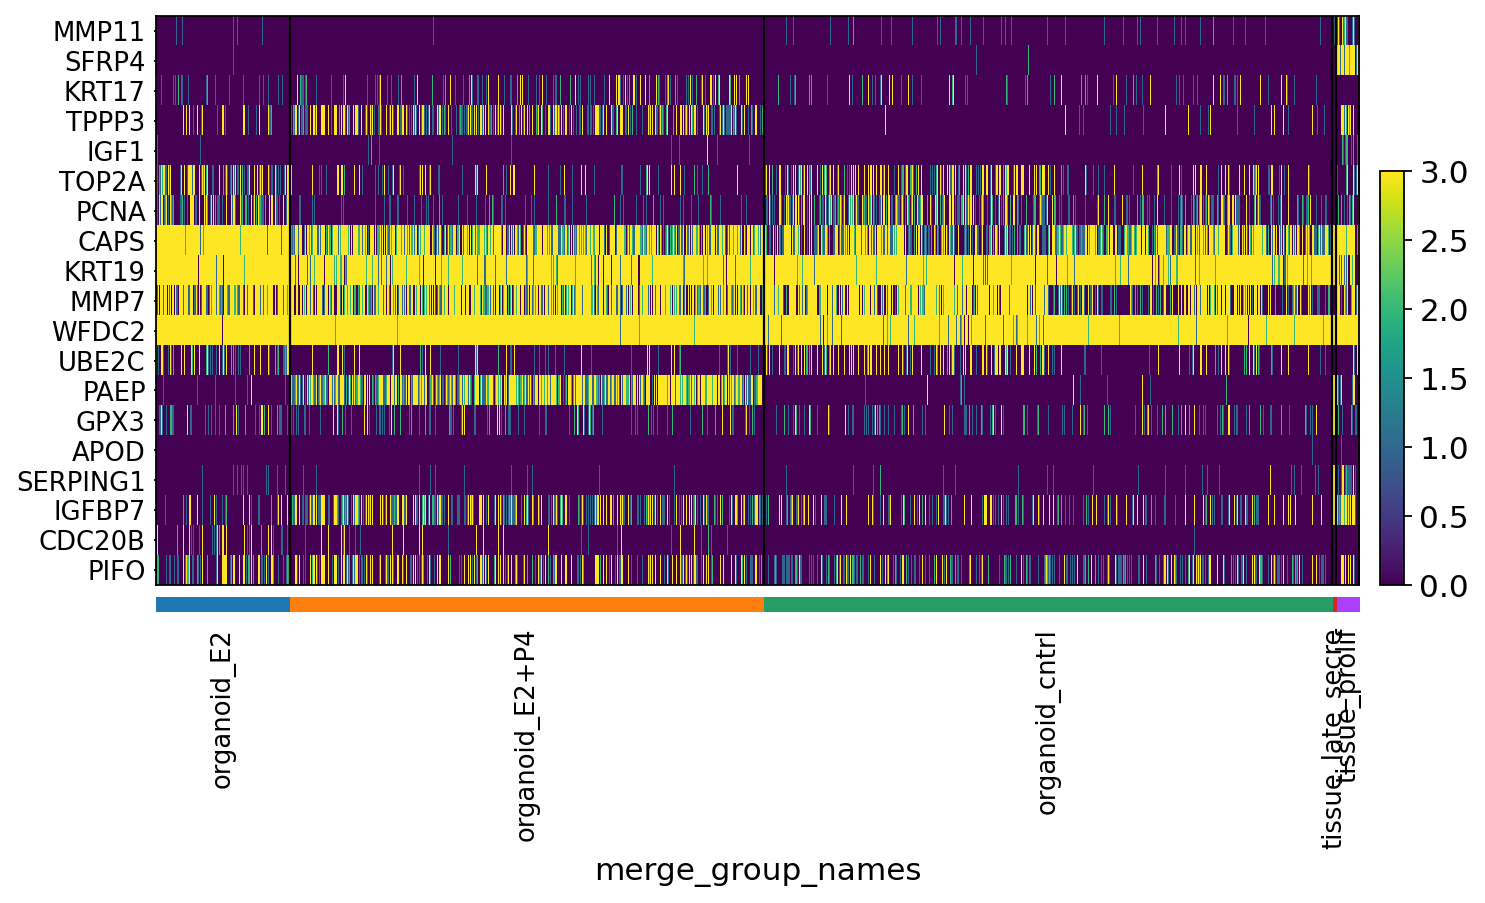

In [12]:
# merge epithelia tissue df and organoid df's for plotting
adata_epithelia_organoids_merged = ad.concat([adata_ti_merged_proliferative_epithelia, 
                                             adata_ti_merged_secretory_epithelia,
                                             adata_org_merged_cntrl, 
                                             adata_org_tx_E2_0,
                                             adata_org_merged_E2P4],
                                             join="outer")
# heatmap for comparing cycle-stage marker
sc.pl.heatmap(adata_epithelia_organoids_merged, markers, 
              swap_axes=True, 
              vmax=3, 
              cmap='viridis',
              groupby="merge_group_names",
              use_raw=True,
              figsize=[10,5])

In [19]:
# get cell counts per merge-group
list_merge_groups = [adata_ti_merged_proliferative_epithelia, 
                     adata_ti_merged_secretory_epithelia,
                     adata_org_merged_cntrl, 
                     adata_org_tx_E2_0,
                     adata_org_merged_E2P4]

for group in list_merge_groups:
    print("{}: {}".format(group.obs["merge_group_names"].drop_duplicates().tolist(), 
                          len(group)))

['tissue_prolif']: 723
['tissue_late_secre']: 136
['organoid_cntrl']: 17896
['organoid_E2']: 4213
['organoid_E2+P4']: 14939


heatmap have to be plotted seperately due to the big difference in cell numbers

In [15]:

# only merge all organoid samples
adata_all_organoids_merged = ad.concat([adata_org_merged_cntrl, 
                                        adata_org_tx_E2_0,
                                        adata_org_merged_E2P4],
                                        join="outer")

In [16]:
# only merge all epithelia samples

adata_epithelia_merged = ad.concat([adata_ti_merged_proliferative_epithelia, 
                                             adata_ti_merged_secretory_epithelia],
                                             join="outer")

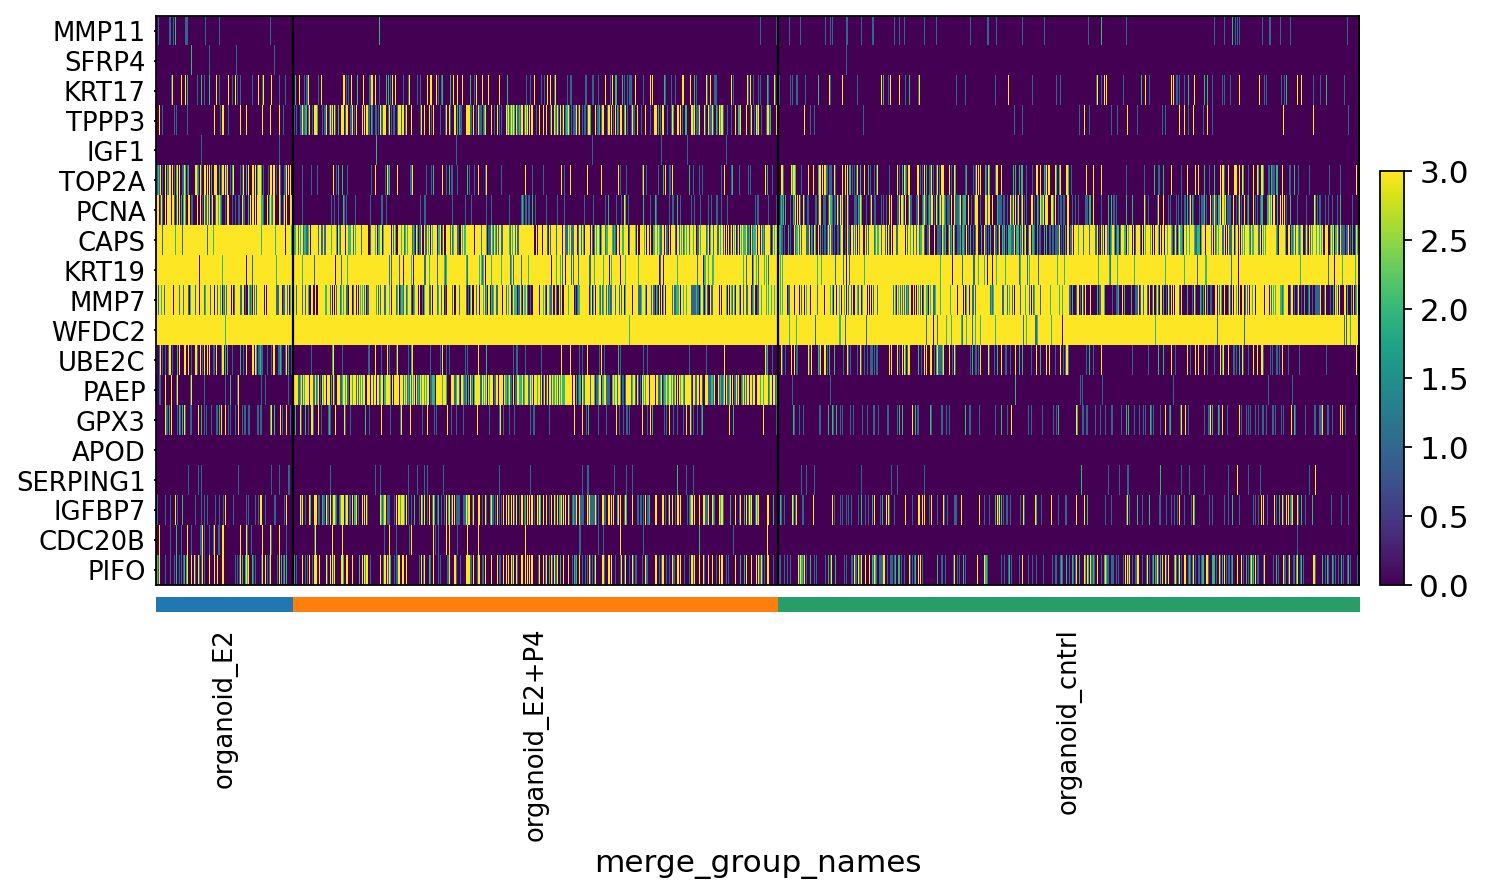

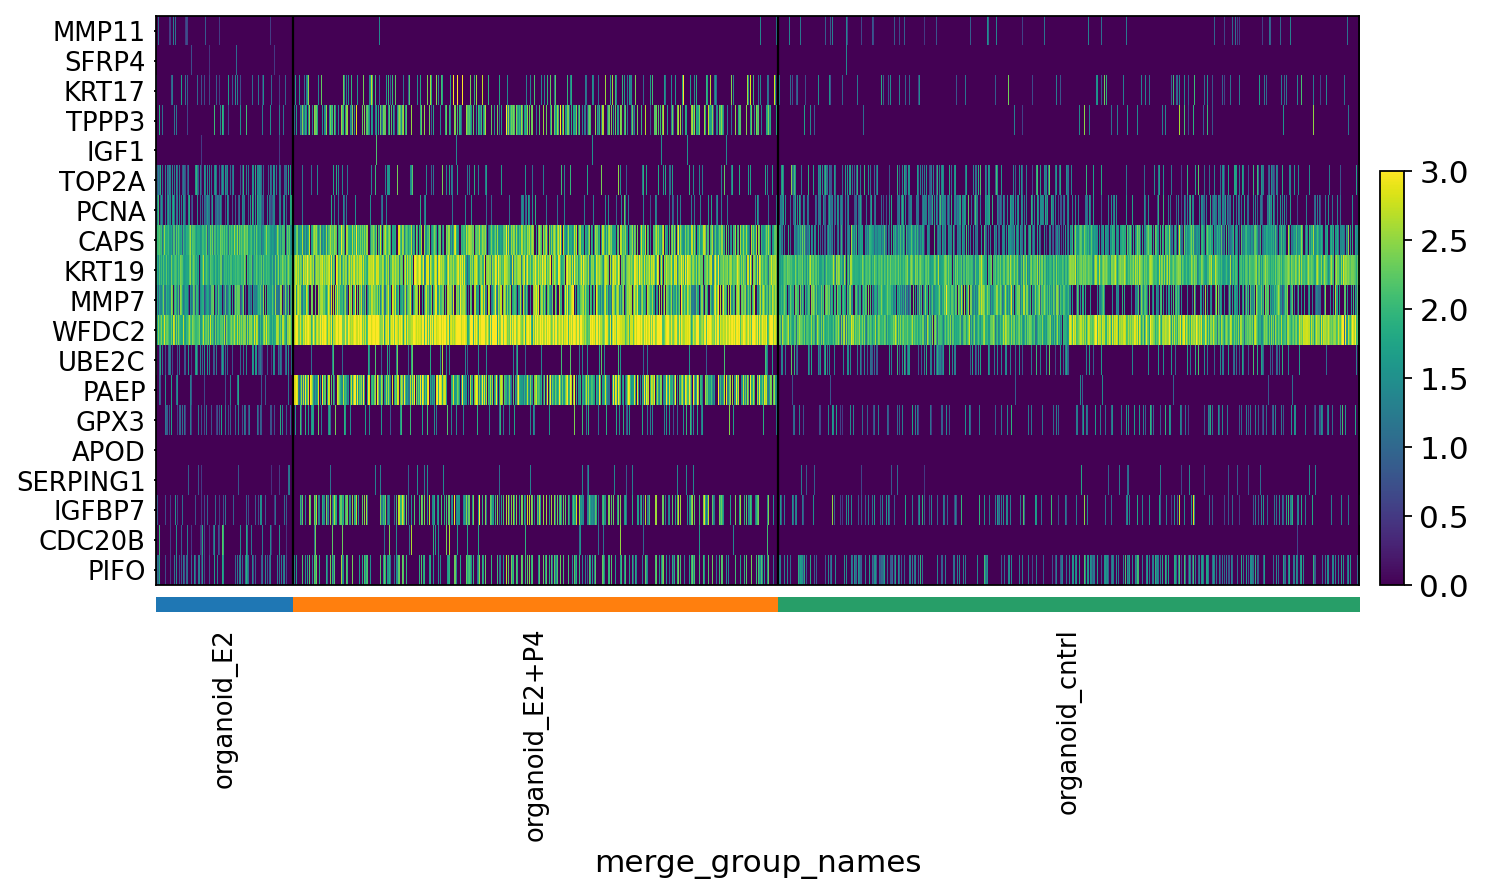

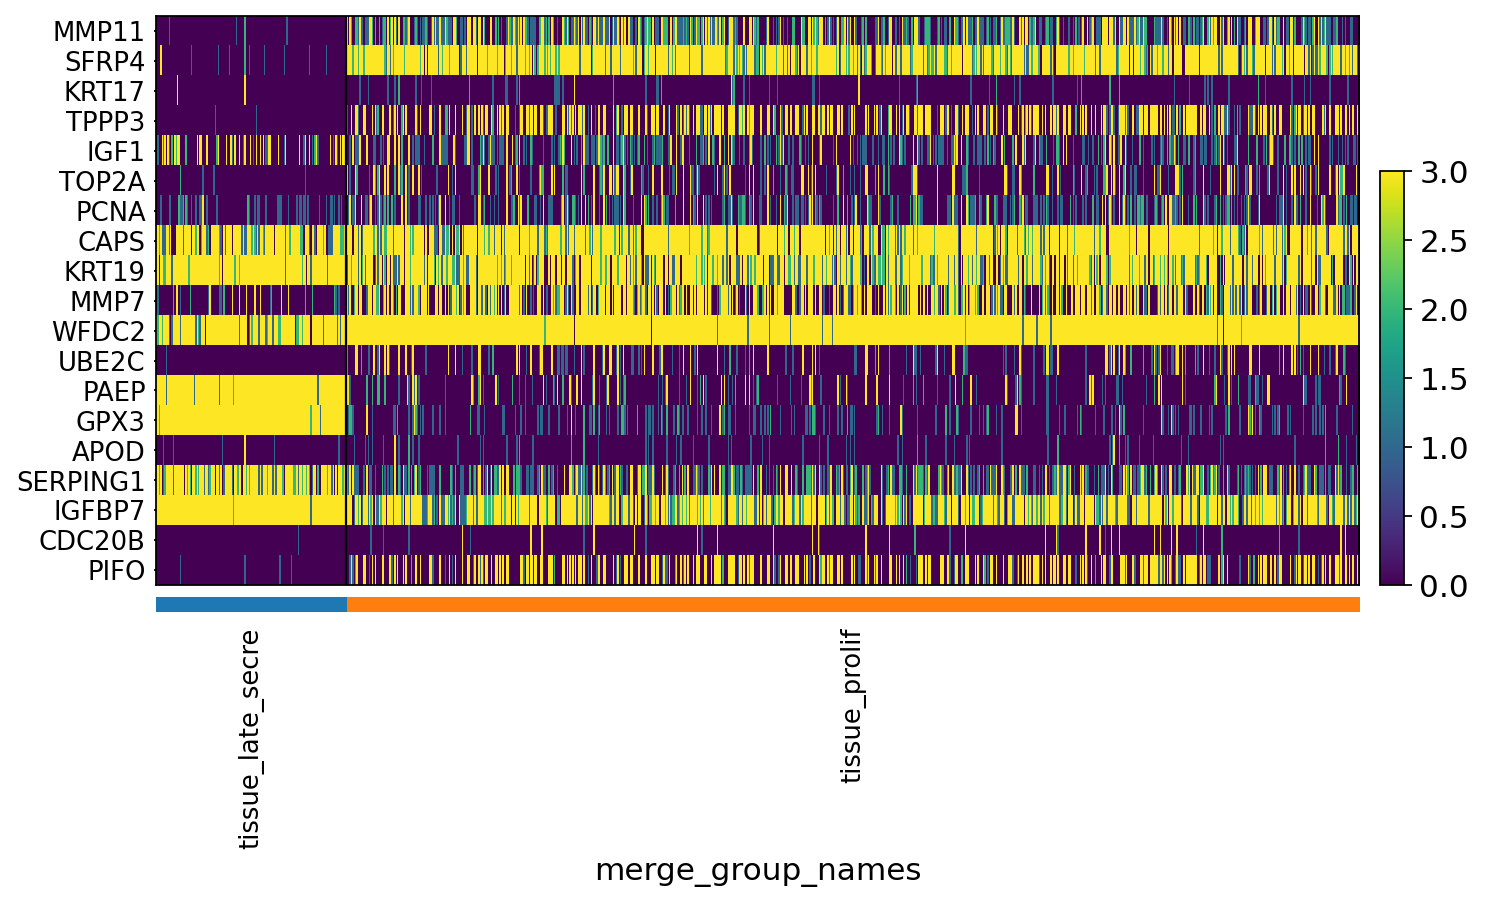

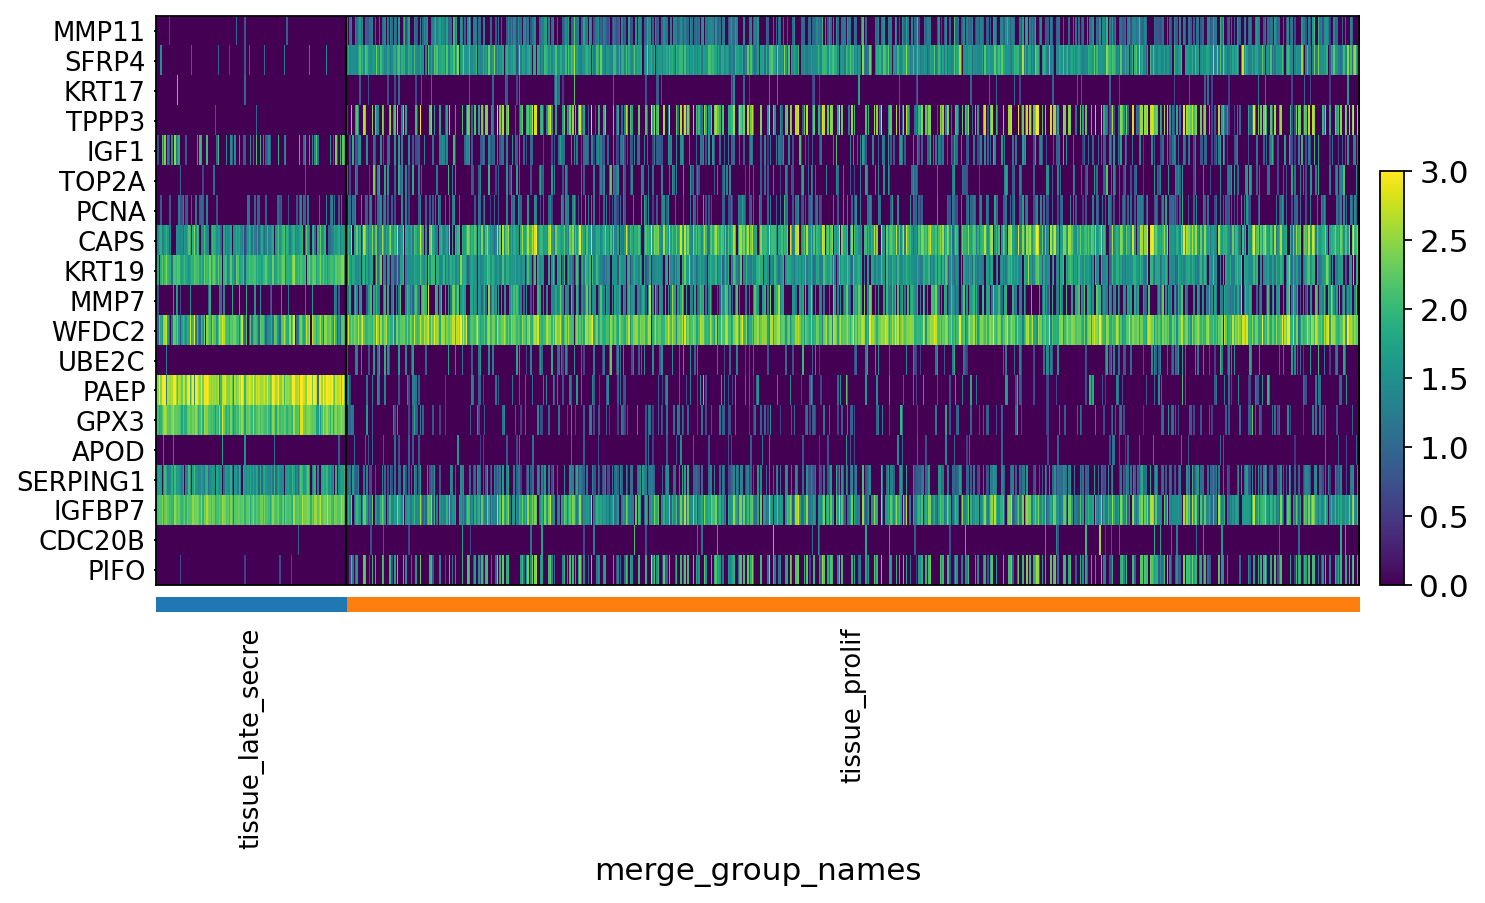

In [23]:
# heatmaps organoids
# Cycle Stage Marker in Organoids, normalize"
sc.pl.heatmap(adata_all_organoids_merged, markers, 
              swap_axes=True, 
              vmax=3, 
              cmap='viridis',
              groupby="merge_group_names",
              use_raw=True,
              figsize=[10,5])

# Cycle Stage Marker in Organoids, scaled"
sc.pl.heatmap(adata_all_organoids_merged, markers, 
              swap_axes=True, 
              vmax=3, 
              cmap='viridis',
              groupby="merge_group_names",
              use_raw=False,
              figsize=[10,5])

# heatmaps epithelia tissue
## Cycle Stage Marker in epithelia tissue, normalized
sc.pl.heatmap(adata_epithelia_merged, markers, 
              swap_axes=True, 
              vmax=3, 
              cmap='viridis',
              groupby="merge_group_names",
              use_raw=True,
              figsize=[10,5])

# Cycle Stage Marker in epithelia tissue, scaled
sc.pl.heatmap(adata_epithelia_merged, markers, 
              swap_axes=True, 
              vmax=3, 
              cmap='viridis',
              groupby="merge_group_names",
              use_raw=False,
              figsize=[10,5])

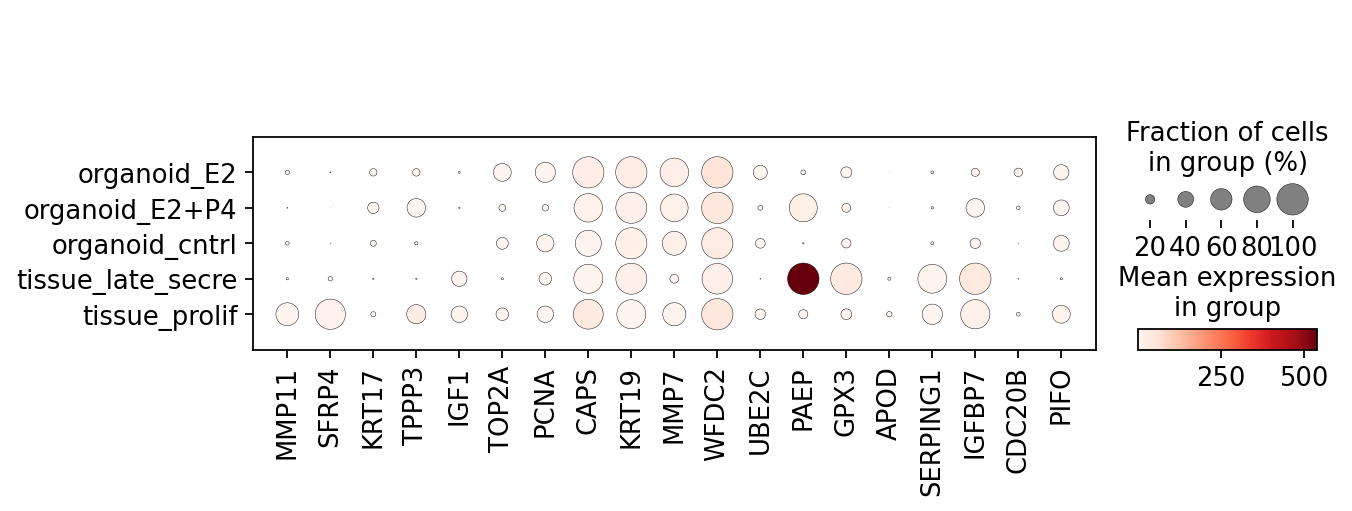

In [20]:
sc.pl.dotplot(adata_epithelia_organoids_merged, markers,
              groupby='merge_group_names');